<a href="https://colab.research.google.com/github/FontanaDaniel1/GeoPandas_esericizi/blob/main/esercitazione_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

caricare il geodataframe delle piste ciclabili bike_ciclabili.zip

In [ ]:
!pip install geopandas
%matplotlib inline

import pandas as pd
import geopandas

In [ ]:
!pip install contextily
import contextily

In [ ]:
piste_ciclabili = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas/bike_ciclabili.zip")

visualizzare il geodataframe

In [ ]:
piste_ciclabili.plot(figsize=(12,12))

caricare il geodataframe dei quartieri ds964_nil_wm.zip

In [ ]:
quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas/ds964_nil_wm.zip")
quartieri

visualizza la mappa dei quartieri e delle piste ciclabili

In [ ]:
quartieri3857 = quartieri.to_crs(epsg = 3857)
piste_ciclabili3857 = piste_ciclabili.to_crs(epsg = 3857)

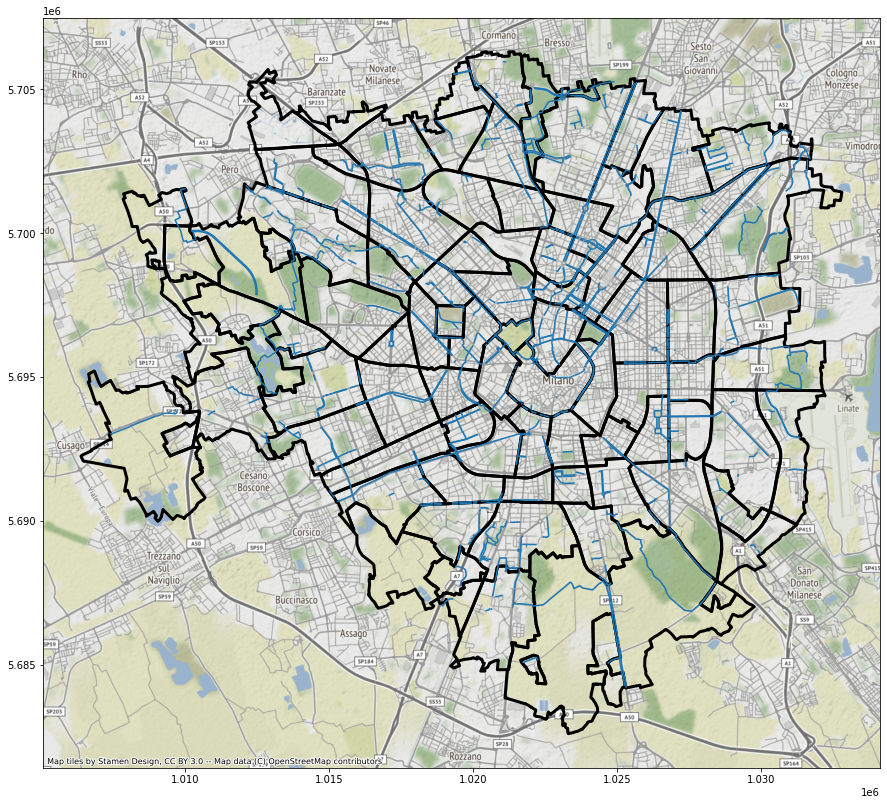

In [ ]:
ax = piste_ciclabili3857.plot(figsize=(15,15), facecolor = 'none') 
quartieri3857.plot(ax = ax, edgecolor = 'k', facecolor = 'none', linewidth = 3)
contextily.add_basemap(ax)

creare una geoserie con le informazioni sulla ciclabile di via Melchiorre Gioia e visualizzarla

geopandas.geoseries.GeoSeries

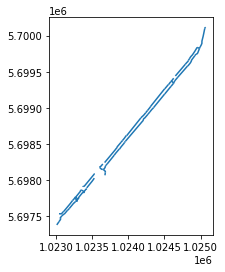

In [ ]:
via_melchiorre_geoserie = piste_ciclabili3857[piste_ciclabili3857["anagrafica"].str.contains('VIA MELCHIORRE GIOIA')]['geometry']
via_melchiorre_geoserie.plot()
type(via_melchiorre_geoserie)
#['geometry'], trasforma in geoserie

In [ ]:
via_melchiorre = piste_ciclabili3857[piste_ciclabili3857["anagrafica"].str.contains('VIA MELCHIORRE GIOIA')] #faccio questo per aver poi il geodataframe e fare gli altri es
via_melchiorre.plot()
type(via_melchiorre)

In [ ]:
via_melchiorre

trovare tutti i quartieri attraversati da questa pista ciclabile

In [ ]:
quartieri_attraversati = quartieri3857[quartieri3857.intersects(via_melchiorre.unary_union)]
quartieri_attraversati
#unary_union, comprime più "via melchiorre" in un unica via
#se volessi tutte le nazioni, faccio prima unary_union, per avere un unico blocco. item(), funziona solo che un singolo blocco

visualizzare su una mappa la pista ciclabile e i quartieri attraversati (utilizzare i colori presenti nell'esempio)

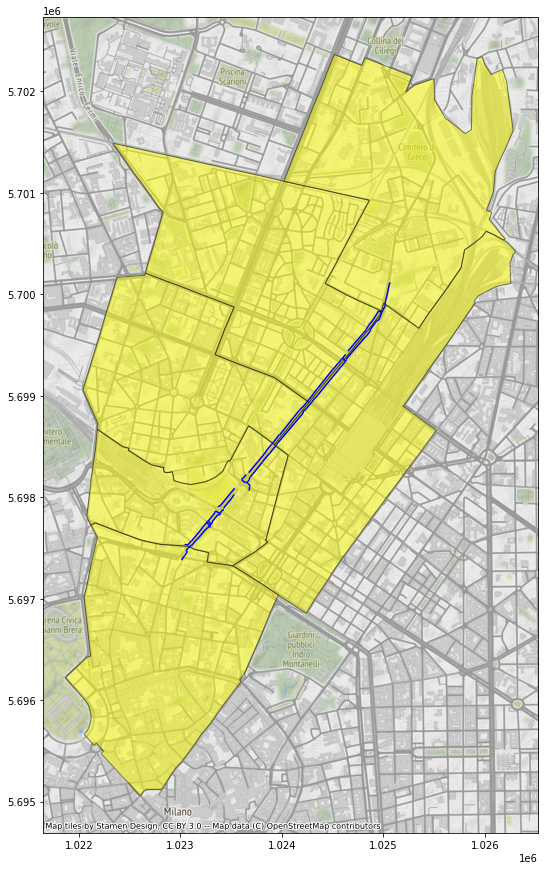

In [ ]:
ax = via_melchiorre.plot(figsize=(15,15), edgecolor = 'b')
quartieri_attraversati.plot(ax = ax, facecolor = 'yellow', alpha = 0.5, edgecolor = 'k')
contextily.add_basemap(ax)

caricare il geodataframe delle fontanelle Fontanelle.zip

In [ ]:
fontanelle = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas/Fontanelle.zip")
fontanelle

visualizzare il geodataframe su una mappa

In [ ]:
fontanelle3857 = fontanelle.to_crs(epsg = 3857)

In [ ]:
ax = fontanelle3857.plot(figsize=(15,15))
contextily.add_basemap(ax)

visualizzare su una mappa le fontanelle e i quartieri in cui si trovano. non visualizzare i quartieri in cui non ci sono fontanelle

In [ ]:
fontanelle = fontanelle3857.unary_union

In [ ]:
ax = fontanelle3857.plot(figsize=(20,20))
quartieri3857[quartieri3857.intersects(fontanelle)].plot(ax = ax, edgecolor = 'k', facecolor = 'none', linewidth = 3)
contextily.add_basemap(ax)

colorare i quartieri in modo proporzionale al numero di fontanelle presenti (giallo molte fontanelle, blu scuro poche fontanelle) non evidenziare i quartieri senza fontanelle

In [ ]:
joined = geopandas.sjoin(fontanelle3857, quartieri3857, predicate='within', how='left') #unione di 2 geodataframe
joined
#predicate='within', prende le fontane dentro i quartieri
#how='left, quello che prende prima

In [ ]:
fontaneQuartiere = joined.groupby('NIL').count()['Licenza'].reset_index() #conta per ogni quartiere il num di fontane 
fontaneQuartiere

In [ ]:
finale = quartieri3857.merge(fontaneQuartiere, on='NIL') #unisco una colonna (fontaneQuartiere) al dataframe
#on='NIL', colonna comune di entrambi i dataframe
finale

In [ ]:
finale.plot(figsize=(12,6), column = 'Licenza', legend = True)

visalizzare la mappa precedente facendo in modo che i quartieri con fontanelle siano colorati con gradazioni di rosso e quelli senza fontanelle con gradazioni di grigio

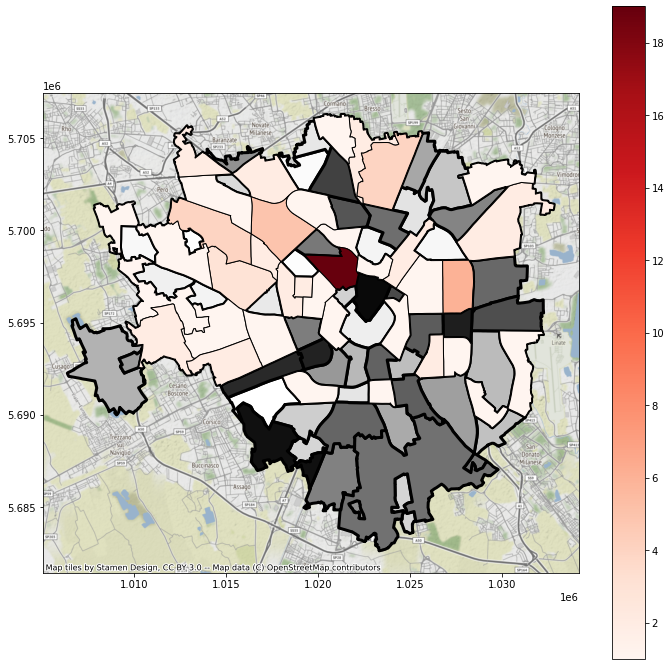

In [ ]:
ao = quartieri3857.plot(figsize=(12,12), legend = True, linewidth = 3, edgecolor = 'k', cmap ='Greys')
finale.plot(ax = ao, column = 'Licenza', legend = True, cmap ='Reds', edgecolor = 'k')
contextily.add_basemap(ao)